#### Chris sutton
#### Lab 5


The lab was interesting but I had serveral unresolved problems. 

Part A
 I ran out of time tryig to solve getting the PCA vectors to resolve in the same plane as the data. i realize the key was I have to find the plane with the cross product of the two vectors then find the dot product with the word data in order to project the pca vectors corrrectly. 

Part B

I had a bug I couldn't resolve in time. Word, Vec in embeddings.py was throwing errors when seeing only a newline. I tried to bypass this by creating a if statement to skip that row of string but i realize now that the headers feed matrix size data along with setting how the matrix gets filled. By using a continue statement I beleive it was corrupting the output files and I couldn't a acheive a result for part b

In [ ]:
#### use to discuss lab results


In [1]:
import gensim
from gensim.models import Word2Vec, KeyedVectors
import matplotlib
from matplotlib import pyplot as plt
import sklearn
from sklearn.decomposition import PCA
import spacy
from nltk.tokenize import word_tokenize
import numpy as np

In [2]:
!python -m spacy download en_core_web_sm

2022-10-11 00:46:09.321559: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 5.2 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
from google.colab import drive
gdrive_mount ='/content/drive'
drive.mount(gdrive_mount, force_remount=True)

Mounted at /content/drive


In [4]:
labdir ='/content/drive/My Drive/NaturalLangaugeProcessing/lab05'
# !mkdir -p "$labdir"
# !mkdir -p "$labdir/data"
# !mkdir -p "$labdir/models"
%cd "$labdir"
!ls

/content/drive/My Drive/NaturalLangaugeProcessing/lab05
data  models  vecmap


In [5]:
nlp = spacy.load('en_core_web_sm', disable = ['ner','parser'])

In [6]:
with open('data/small.txt','r') as infile:
  collection = [[token.text for token in nlp(line.lower()) if not token.is_punct] for  line in infile]

In [7]:
assert len(collection) == 50000,"Load of small.txt failed"
print(collection[43])

['apparently', 'mr', 'mace', 'says', 'when', 'the', 'camera', 'flashed', 'the', 'grizzly', 'slashed', '\n']


In [8]:
model = Word2Vec(sentences=collection, size=100, window=5, min_count=2, sg=1, negative=8)
print(model)

Word2Vec(vocab=26733, size=100, alpha=0.025)


**(10 points) To visualize the vector relationships between related words, make a 2-dimensionalprojection using PCA (principal component analysis). Create a scatter plot for this list of words:
['paris', 'istanbul', 'moscow', 'france', 'turkey', 'russia', 'cat', 'dog','truck', 'train', 'two', 'three', 'four']
.
You may use the SKLearn PCA package,imported above, or your own favorite package. Be sure to run the PCA over all of the words in themodel, not just this list of words.**

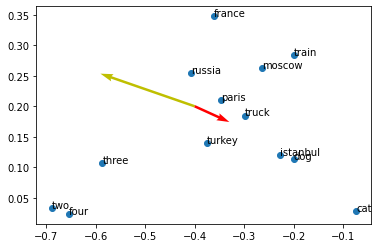

0.31279958043972594
-0.3470704


In [136]:
pca_list=[]
for word in model.wv.vocab.keys():
 pca_list.append(model.wv[word])


pca = PCA(n_components=2)
Xfit=pca.fit_transform(pca_list)
# np.linalg.norm(Xfit[:,0])





x=[]
y=[]
txt=[]
wordList=['paris', 'istanbul', 'moscow', 'france', 'turkey', 'russia', 'cat', 'dog', 'truck', 'train', 'two', 'three', 'four']
for w in wordList:
  x.append(model.wv[w][0])
  y.append(model.wv[w][1])
  txt.append(w)

X1 = [-.4]
Y1 = [.20]

U1 = [Xfit[0][0]]  
V1 = [Xfit[1][0]] 
U2 =[Xfit[0][1]]
V2 =[Xfit[1][1]]

plt.scatter(x, y)
plt.quiver(X1, Y1, U1, V1, color='y', units='xy', scale=5)
plt.quiver(X1, Y1, U2, V2, color='r', units='xy', scale=5)
for i, txti in enumerate(txt):
    plt.annotate(txti, (x[i], y[i]))

plt.show()
print(Xfit[1][0])
print(model.wv['paris'][0])

In [ ]:
model = KeyedVectors.load_word2vec_format("data/GoogleNews-vectors-negative300.bin", binary=True)

In [32]:
print(model['purple'])

[-0.09557633  0.12834084 -0.0196477  -0.12792784 -0.10276476  0.1212372
  0.09147494 -0.20112972 -0.16169445  0.07238343 -0.04731987 -0.02234955
  0.0139107  -0.10171024  0.26285756 -0.10666576  0.11222386 -0.03552349
  0.18187374 -0.06558789  0.05781915 -0.19507135 -0.10940044 -0.0012089
  0.0483851  -0.0434776   0.40909618  0.2623347  -0.1551834   0.12443314
 -0.0697987   0.3730893   0.01661772 -0.02401005  0.22415335 -0.33751926
  0.21889485 -0.06299019  0.28127187 -0.25818458 -0.04431643  0.09503945
  0.33766317  0.17448215  0.04475486  0.13554735 -0.06883849  0.00805323
 -0.00616184  0.06051381  0.24137019 -0.11565018 -0.01134476  0.0351477
  0.11994879 -0.0042499   0.18992023  0.03546664  0.11726101 -0.29147878
 -0.17448571 -0.15612671 -0.07528943 -0.13552198  0.01067847  0.24790879
  0.21992356  0.04451312 -0.0077791   0.10975255  0.0987324   0.16470413
 -0.18274347 -0.22847559  0.00439905 -0.1573938   0.09526734  0.09075328
 -0.37637007  0.01713455  0.1651875   0.00393039  0.07

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
# model.wv['mr'] #: vector for word x
# model.wv.similarity('you','mr')  #cosine similarity between vectors for x and y
# model.wv.distance('you', 'mr')  #: 1 - cosine similarity of x and y
# model.wv.most_similar(positive=[x, y, z], negative=[a, b, c], topn=k):  return k-most similar
# model.wv.most_similar_cosmul: like most_similar with a different function for three word analogies

In [ ]:
model.most_similar (positive=['wine'])

[('wines', 0.861979067325592),
 ('chardonnay', 0.7595281004905701),
 ('pinot_noir', 0.7584253549575806),
 ('sparkling_wine', 0.7562699317932129),
 ('sparkling_wines', 0.7555115222930908),
 ('pinot', 0.7421018481254578),
 ('rosé', 0.7397210597991943),
 ('vino', 0.7260570526123047),
 ('merlot', 0.7179162502288818),
 ('Pinot_Noir', 0.7176920175552368)]

**(3 points) Use the API to fi nd the words most similar to 'fascinating,' 'cultivate,' and  'eggplant,' and report your results. Is any of the  most similar words a reasonable synonym or  antonym for the inputword?**

In [ ]:
model.most_similar (positive=['fascinating'])

[('interesting', 0.762306809425354),
 ('intriguing', 0.7245113849639893),
 ('enlightening', 0.6644250154495239),
 ('captivating', 0.6459898948669434),
 ('facinating', 0.6416683793067932),
 ('riveting', 0.6324825286865234),
 ('instructive', 0.6210989356040955),
 ('endlessly_fascinating', 0.618861198425293),
 ('revelatory', 0.6170243620872498),
 ('engrossing', 0.6126049160957336)]

In [ ]:
model.most_similar (positive=['cultivate'])

[('cultivating', 0.7274794578552246),
 ('cultivated', 0.6766660213470459),
 ('nurture', 0.6695470809936523),
 ('cultivates', 0.6159786581993103),
 ('develop', 0.6053071618080139),
 ('Cultivate', 0.5910324454307556),
 ('Cultivating', 0.5667836666107178),
 ('nuture', 0.5440778732299805),
 ('nourish', 0.5328434705734253),
 ('grow', 0.5282535552978516)]

In [ ]:
model.most_similar (positive=['eggplant'])

[('zucchini', 0.726477861404419),
 ('cauliflower', 0.6968439221382141),
 ('eggplants', 0.6966414451599121),
 ('bok_choy', 0.690737247467041),
 ('bell_peppers', 0.6875451803207397),
 ('broccoli_rabe', 0.6864162087440491),
 ('bell_pepper', 0.685966432094574),
 ('asparagus', 0.6851089000701904),
 ('pesto', 0.6766840219497681),
 ('escarole', 0.6759322881698608)]

**(2 points) Do you believe that the similarity / distance functions are intuitive? For example, are pairs like mother/father closer than mother/ocean? Explain your reasoning.**

The cosine similarity measure shows that mother/ father are close in similiarty while mother / ocean is much less similar. The distance measure simply reflect the 1- cosine similarity of the pair

In [ ]:
print('The cosine similarity of mother/father is :',model.similarity('mother','father'), 'The distance is :',model.distance('mother', 'father'))
print('The cosine similarity of mother/ocean is :',model.similarity('mother','ocean'), 'The distance is :',model.distance('mother', 'ocean'))




The cosine similarity of mother/father is : 0.79014826 The distance is : 0.20985174179077148
The cosine similarity of mother/ocean is : 0.10562345 The distance is : 0.8943765535950661


**(2 points) According to the API, which words best complete the analogy, puppies is to dog as X isto cat?**

In [ ]:
model.most_similar (positive=['puppies'])[0]

('kittens', 0.8321467638015747)

**(4 points) A classic example is queen = (king - man) + woman. Find two other interesting analogies using the API.**

In [ ]:
print(model.most_similar(positive=['king','woman'],negative=['man'])[0])
print(model.most_similar(positive=['football','baseball','soccer', 'basketball'],negative=['players'])[0])
print(model.most_similar(positive=['city'],negative=['crime'])[0])
print((model.most_similar(positive=['house'],negative=['windows'])[0]))

('queen', 0.7118192911148071)
('softball', 0.7290028929710388)
('town', 0.448047012090683)
('bungalow', 0.3816678524017334)


**(6 points) Compare the embedding vectors for pairs of words that are synonyms, antonyms, similar,related, or subordinate/superordinate. Given a pair of words, do you think it is possible to determinewhether they are:
 a) synonymous, b) antonymous, c) similar, d) related, e) subordinate/superordinate, or f) unrelated, using only their embedding vectors? Give your reasoning for each category of relationship.**

In [ ]:
print('Similarity between synonyms bad and awful :',model.similarity('bad','awful'))
print('Similarity between antonyms early and late :',model.similarity('early','late'))
print('Similarity between similar words car and truck :',model.similarity('car','truck'))
print('Similarity between related words flight and jet :',model.similarity('flight','jet'))
print('Similarity between superordinate/subordinate home and apartment :',model.similarity('home','apartment'))
print('Similarity between unrelated words apple and gasoline :',model.similarity('apple','gasoline'))

Similarity between synonyms bad and awful : 0.5527253
Similarity between antonyms early and late : 0.8121283
Similarity between similar words car and truck : 0.67357904
Similarity between related words flight and jet : 0.5873552
Similarity between superordinate/subordinate home and apartment : 0.45603448
Similarity between unrelated words apple and gasoline : 0.11532139


In [ ]:
model.most_similar (positive=['bad'])

[('good', 0.7190051078796387),
 ('terrible', 0.6828612089157104),
 ('horrible', 0.6702598333358765),
 ('Bad', 0.6698919534683228),
 ('lousy', 0.6647640466690063),
 ('crummy', 0.5677819848060608),
 ('horrid', 0.5651682615280151),
 ('awful', 0.5527253150939941),
 ('dreadful', 0.5526429414749146),
 ('horrendous', 0.5445997714996338)]

**(3 points) Record any interesting observations, and report any examples you like of good or dubious performance.**

#Part B: Using Word Embeddings to Learn Translations

In [20]:
!git clone https://github.com/artetxem/vecmap

Cloning into 'vecmap2'...
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
labdir ='/content/drive/My Drive/NaturalLangaugeProcessing/lab05'
!mkdir -p "$labdir"
!mkdir -p "$labdir/data"
!mkdir -p "$labdir/models"
%cd "$labdir"
!ls

/content/drive/My Drive/NaturalLangaugeProcessing/lab05
data  models  vecmap


In [ ]:
def loadfile(filename):
  with open(filename,'r') as infile:
    collection = [[token.text for token in nlp(line.lower()) if not token.is_punct] for  line in infile]
  return collection
ensents = loadfile('data/eng.txt')
essents = loadfile('data/spa.txt')
enmodel = Word2Vec(sentences=ensents, size=100, window=5, min_count=2, sg=1, negative=8)
enmodel.wv.save_word2vec_format('models/eng.w2v.model')
esmodel = Word2Vec(sentences=essents, size=100, window=5, min_count=2, sg=1, negative=8)
esmodel.wv.save_word2vec_format('models/spa.w2v.model')

In [26]:
!python3 vecmap/map_embeddings.py --supervised data/es-en.train.txt models/spa.w2v.model models/eng.w2v.model \
			models/spa_mapped.emb models/eng_mapped.emb

['']
['\n']
['\x85\n']


In [27]:
spa2eng = gensim.models.KeyedVectors.load_word2vec_format('models/spa_mapped.emb')
eng2spa = gensim.models.KeyedVectors.load_word2vec_format('models/eng_mapped.emb')

for word in ['playa', 'villa', 'perros', 'naufragio', 'islas', 'cantar', 'calles', 'naranjas', 'bomberos', \
	'escalera', 'nadó','frontera', 'pasaporte', 'fábrica']:
  print ("%s %s" % (word, eng2spa.similar_by_vector(spa2eng[word])[0]))

EOFError: ignored